In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [35]:
context = 512
n_parts = 2

df = pd.read_csv(f"figs/stats_distr_tfhe_{context}_{n_parts}.csv", index_col=0)
df


,plain_time,plain_acc,crypt_time,crypt_acc,enc_time,add_time,dec_time
count,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.00000
mean,0.010043,0.686850,0.070765,0.688450,645.08000,238.950000,28.42000
std,0.001214,0.009284,0.001253,0.010581,42.20505,19.718921,1.88122
min,0.007360,0.665000,0.068126,0.665000,487.00000,179.000000,22.00000
25%,0.009179,0.680000,0.070180,0.680000,647.00000,231.750000,29.00000
50%,0.010364,0.690000,0.070572,0.690000,651.00000,242.000000,29.00000
75%,0.010585,0.695000,0.071220,0.695000,658.00000,246.000000,29.00000
max,0.014673,0.705000,0.078701,0.715000,720.00000,300.000000,37.00000


In [36]:
data = []
for context in [256,512]:
    for n_parts in [2,4,8,16]:
        df = pd.read_csv(f"figs/stats_distr_tfhe_{context}_{n_parts}.csv", index_col=0)
        row = ["tfhe %d"%context, n_parts,
               df.loc["mean","plain_acc"],df.loc["std","plain_acc"],
               df.loc["mean","crypt_acc"],df.loc["std","crypt_acc"],
               1e-3*df.loc["mean","enc_time"],
               1e-3*df.loc["mean","add_time"]/(n_parts-1),
               1e-3*df.loc["mean","dec_time"]]
        data.append(row)

stats_tfhe = pd.DataFrame(data, columns=["context", "parts", "plain_acc", "plain_std",
                "crypt_acc", "crypt_std", "enc time", "add time", "dec time"])   

stats_tfhe


,context,parts,plain_acc,plain_std,crypt_acc,crypt_std,enc time,add time,dec time
0,tfhe 256,2,0.68890,0.010650,0.68615,0.012510,0.32401,0.126970,0.01571
1,tfhe 256,4,0.68640,0.010543,0.68110,0.015868,0.34089,0.090387,0.01636
2,tfhe 256,8,0.69055,0.009398,0.64145,0.044886,0.33126,0.070411,0.01477
3,tfhe 256,16,0.69435,0.007130,0.58350,0.060991,0.34068,0.065401,0.01484
4,tfhe 512,2,0.68685,0.009284,0.68845,0.010581,0.64508,0.238950,0.02842
5,tfhe 512,4,0.68745,0.009987,0.68780,0.008998,0.62891,0.165537,0.02762
6,tfhe 512,8,0.68875,0.009624,0.68930,0.008469,0.62091,0.128159,0.02676
7,tfhe 512,16,0.69185,0.007774,0.69375,0.007226,0.59609,0.115450,0.02727


In [37]:
context = 4096
n_parts = 2

df = pd.read_csv(f"figs/stats_distr_{context}_{n_parts}.csv", index_col=0)
df


,plain_time,plain_acc,crypt_time,crypt_acc,enc_time,add_time,dec_time
count,100.000000,100.0000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,0.004544,0.6893,0.056612,0.68740,0.004462,0.000065,0.001066
std,0.001407,0.0100,0.012785,0.00917,0.001077,0.000017,0.000271
min,0.003078,0.6650,0.044173,0.66000,0.003576,0.000049,0.000847
25%,0.003620,0.6850,0.047453,0.68000,0.003784,0.000053,0.000898
50%,0.004099,0.6900,0.051811,0.69000,0.003912,0.000055,0.000927
75%,0.005281,0.6950,0.056577,0.69500,0.004914,0.000082,0.001415
max,0.012079,0.7200,0.095394,0.71000,0.006501,0.000100,0.001606


In [38]:
data = []
for context in [4096,8192]:
    for n_parts in [2,4,8,16]:
        df = pd.read_csv(f"figs/stats_distr_{context}_{n_parts}.csv", index_col=0)
        row = ["ckks %d"%context, n_parts,
               df.loc["mean","plain_acc"],df.loc["std","plain_acc"],
               df.loc["mean","crypt_acc"],df.loc["std","crypt_acc"],
               1e3*df.loc["mean","enc_time"],
               1e3*df.loc["mean","add_time"],
               1e3*df.loc["mean","dec_time"]]
        data.append(row)

stats_ckks = pd.DataFrame(data, columns=["context", "parts", "plain_acc", "plain_std",
                "crypt_acc", "crypt_std", "enc time", "add time", "dec time"])   

stats_ckks


,context,parts,plain_acc,plain_std,crypt_acc,crypt_std,enc time,add time,dec time
0,ckks 4096,2,0.68930,0.010000,0.68740,0.009170,4.461925,0.064926,1.066344
1,ckks 4096,4,0.68665,0.009158,0.68845,0.008430,3.735745,0.056174,0.896294
2,ckks 4096,8,0.68955,0.009669,0.69065,0.008606,3.925855,0.058014,0.939808
3,ckks 4096,16,0.69210,0.007693,0.69185,0.007408,3.997896,0.056806,0.943775
4,ckks 8192,2,0.68755,0.009468,0.68830,0.010474,9.453592,0.137169,2.632728
5,ckks 8192,4,0.68770,0.010260,0.68950,0.009937,11.587622,0.178649,3.734348
6,ckks 8192,8,0.69090,0.008084,0.69070,0.008646,9.598596,0.136709,2.648971
7,ckks 8192,16,0.69185,0.008308,0.69225,0.007732,9.645407,0.144725,2.648363


In [39]:
time_summary = pd.concat([stats_tfhe,stats_ckks]).groupby("context").mean().iloc[:,-3:].round(3).iloc[[2,3,0,1]]
time_summary.to_csv("tbls/logres_time_summary.csv")
time_summary


,enc time,add time,dec time
context,,,
tfhe 256,0.334,0.088,0.015
tfhe 512,0.623,0.162,0.028
ckks 4096,4.030,0.059,0.962
ckks 8192,10.071,0.149,2.916


In [49]:
acc = 100*pd.concat([stats_ckks,stats_tfhe]).groupby("parts")[["plain_acc"]].mean().join(
    pd.concat([stats_ckks,stats_tfhe]).pivot(index="parts", columns="context", values="crypt_acc")).T
acc.rename(index={"plain_acc":"plain text"}, inplace=True)
acc


parts,2,4,8,16
plain text,68.815,68.705,68.99375,69.253750
ckks 4096,68.740,68.845,69.06500,69.185000
ckks 8192,68.830,68.950,69.07000,69.225000
tfhe 256,68.615,68.110,64.14500,58.350000
tfhe 512,68.845,68.780,68.93000,69.374999


In [50]:
std = 100*pd.concat([stats_ckks,stats_tfhe]).groupby("parts")[["plain_std"]].mean().join(
    pd.concat([stats_ckks,stats_tfhe]).pivot(index="parts", columns="context", values="crypt_std")).T
std.rename(index={"plain_std":"plain text"}, inplace=True)
std


parts,2,4,8,16
plain text,0.985061,0.998691,0.919354,0.772609
ckks 4096,0.916955,0.842959,0.860628,0.740784
ckks 8192,1.047411,0.993666,0.864624,0.773209
tfhe 256,1.250968,1.586845,4.488647,6.099139
tfhe 512,1.058144,0.899831,0.846919,0.722561


In [51]:
#acc_summary = acc.round(1).astype(str) + " (" + std.round(1).astype(str) + ")"
acc_summary = (acc.round(1).astype(str) + "±" + std.round(1).astype(str) + "").iloc[[3,4,0,1,2]]
acc_summary = acc_summary
acc_summary.to_csv("tbls/logres_acc_summary.csv")
acc_summary


parts,2,4,8,16
tfhe 256,68.6±1.3,68.1±1.6,64.1±4.5,58.3±6.1
tfhe 512,68.8±1.1,68.8±0.9,68.9±0.8,69.4±0.7
plain text,68.8±1.0,68.7±1.0,69.0±0.9,69.3±0.8
ckks 4096,68.7±0.9,68.8±0.8,69.1±0.9,69.2±0.7
ckks 8192,68.8±1.0,68.9±1.0,69.1±0.9,69.2±0.8


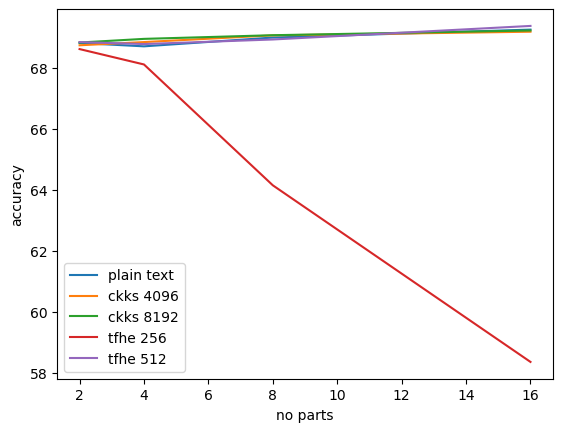

In [52]:
acc.T.plot()
plt.legend()
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("no parts")
plt.savefig("figs/logreg_acc.png")
plt.show()


In [44]:
param = 4096
df = pd.read_csv(f"figs/results_basic_{param}.csv", index_col=0)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.396406,0.005033,0.000126,0.675,0.461613,0.039900,0.670,0.392968,0.036664,0.665,0.498110,0.038021,0.665
1,0.388855,0.004548,0.000129,0.675,0.467259,0.037749,0.670,0.389941,0.036010,0.675,0.495603,0.038030,0.670
2,0.399415,0.007467,0.000182,0.700,0.481218,0.042627,0.665,0.406059,0.037371,0.670,0.507150,0.037176,0.665
3,0.379892,0.007615,0.000193,0.700,0.461322,0.039402,0.645,0.411302,0.038011,0.645,0.516413,0.039094,0.640
4,0.381588,0.006550,0.000175,0.700,0.460068,0.038985,0.680,0.405612,0.037472,0.680,0.502083,0.038457,0.680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.386645,0.004797,0.000195,0.695,0.447393,0.037776,0.670,0.389898,0.037317,0.665,0.504083,0.037856,0.665
96,0.374006,0.004530,0.000120,0.695,0.448354,0.037460,0.640,0.414314,0.038298,0.650,0.504833,0.037804,0.640
97,0.382146,0.004797,0.000192,0.655,0.454483,0.038417,0.645,0.401362,0.037543,0.645,0.486654,0.036395,0.645
98,0.361923,0.004517,0.000122,0.675,0.444074,0.037611,0.705,0.386775,0.035425,0.700,0.492200,0.036560,0.695


In [45]:
# Accuracy
cols = ["00","01","10","11"]
idxs = [3 + 3*i for i in range(4)]
tmp = df.iloc[:,idxs].copy()
tmp.columns = cols
tmp = tmp.describe()
acc = 100*tmp.loc[["mean"],:].T
acc["param"] = acc.index.map(lambda a: "plain" if a[0]=="0" else "cipher")
acc["data"] = acc.index.map(lambda a: "plain" if a[1]=="0" else "cipher")
acc = acc.pivot(index="data", columns="param", values="mean")
acc = acc.sort_index(ascending=False).sort_index(ascending=False,axis=1)
std = 100*tmp.loc[["std"],:].T
std["param"] = std.index.map(lambda a: "plain" if a[0]=="0" else "cipher")
std["data"] = std.index.map(lambda a: "plain" if a[1]=="0" else "cipher")
std = std.pivot(index="data", columns="param", values="std")
std = std.sort_index(ascending=False).sort_index(ascending=False,axis=1)
#tmp = acc.round(1).astype(str) + " (" + std.round(1).astype(str) + ")"
tmp = acc.round(1).astype(str) + "±" + std.round(1).astype(str) + ""
tmp.to_csv("tbls/logres_accuracy.csv")
tmp



param,plain,cipher
data,,
plain,68.5±1.2,66.1±1.5
cipher,66.1±1.5,66.0±1.6


In [46]:
# Evaltime
cols = ["00","01","10","11"]
idxs = [1 + 3*i for i in range(4)]
tmp = 1000*df.iloc[:,idxs].copy()
tmp.columns = cols
tmp = tmp.describe()
tmp = tmp.loc[["mean"],:].T.round(1)
tmp["param"] = tmp.index.map(lambda a: "plain" if a[0]=="0" else "cipher")
tmp["data"] = tmp.index.map(lambda a: "plain" if a[1]=="0" else "cipher")
tmp = tmp.pivot(index="data", columns="param", values="mean")
tmp = tmp.sort_index(ascending=False).sort_index(ascending=False,axis=1).round(4)
tmp.to_csv("tbls/logres_evaltime.csv")
tmp


param,plain,cipher
data,,
plain,6.3,405.8
cipher,477.0,508.1
